In [10]:
# Importing the libraries 

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

# Ignore harmless warnings 

import warnings 
warnings.filterwarnings("ignore")

# Set to display all the columns in dataset

pd.set_option("display.max_columns", None)

# Import psql to run queries 

import pandasql as psql

In [11]:
# Load the 'Customer Churn Problem' data

CustChurn = pd.read_csv(r"C:\Users\Admin\Downloads\Raju Sir DLS\Churn_Modelling.csv", header=0)
CustChurn.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [12]:
# Check if there are duplicate rows in the dataset

CustChurn.duplicated().any()

False

In [13]:
# Copy the file to back-up

CustChurn_bk = CustChurn.copy()

# Drop the variables which are not infulencing on target variable

CustChurn = CustChurn.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

In [14]:
# Display the information of dataset

CustChurn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [15]:
# Display the Geography varibles count

CustChurn['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [16]:
# Display the Gender varibale count

CustChurn['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [17]:
# Convert 'Geography' and 'Gender' to numerical format using one hot encoding

CustChurn = pd.get_dummies(CustChurn, columns=['Geography', 'Gender'])
CustChurn.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0


In [18]:
# Display the information of dataset after conversion of variables

CustChurn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  int64  
 1   Age                10000 non-null  int64  
 2   Tenure             10000 non-null  int64  
 3   Balance            10000 non-null  float64
 4   NumOfProducts      10000 non-null  int64  
 5   HasCrCard          10000 non-null  int64  
 6   IsActiveMember     10000 non-null  int64  
 7   EstimatedSalary    10000 non-null  float64
 8   Exited             10000 non-null  int64  
 9   Geography_France   10000 non-null  uint8  
 10  Geography_Germany  10000 non-null  uint8  
 11  Geography_Spain    10000 non-null  uint8  
 12  Gender_Female      10000 non-null  uint8  
 13  Gender_Male        10000 non-null  uint8  
dtypes: float64(2), int64(7), uint8(5)
memory usage: 752.1 KB


In [19]:
# Display the target varibale count

CustChurn['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [20]:
# Convert the target data type into category variable

CustChurn['Exited'] = CustChurn['Exited'].astype("category")

In [21]:
# Identify the Independent and Target variables

IndepVar = []
for col in CustChurn.columns:
    if col != 'Exited':
        IndepVar.append(col)

TargetVar = 'Exited'

x = CustChurn[IndepVar]
y = CustChurn[TargetVar]

In [22]:
# Splitting the dataset into train and test 

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 42) 

In [23]:
# Feature Scaling - Each independent variable is in different range. The process of transforming all the 
# features in the given data set to a fixed range is known as ‘Scaling’

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

Confusion matrix : 
 [[ 303  281]
 [ 312 2104]]
Outcome values : 
 303 281 312 2104
Classification report : 
               precision    recall  f1-score   support

           1       0.49      0.52      0.51       584
           0       0.88      0.87      0.88      2416

    accuracy                           0.80      3000
   macro avg       0.69      0.69      0.69      3000
weighted avg       0.81      0.80      0.80      3000

Accuracy : 80.2 %
Precision : 49.3 %
Recall : 51.9 %
F1 Score : 0.505
Specificity or True Negative Rate : 87.1 %
Balanced Accuracy : 69.5 %
MCC : 0.382
roc_auc_score: 0.695


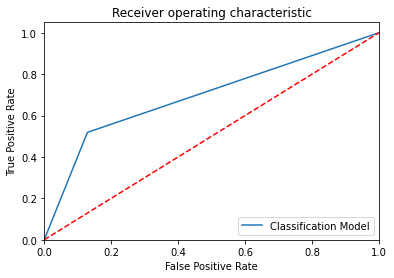

-----------------------------------------------------------------------------------------------------


In [24]:
# To build the 'Multinominal Decision Tree' model with random sampling

from sklearn.tree import DecisionTreeClassifier 

#CustChurnDT = DecisionTreeClassifier()

#ccp_alpha=0.0, class_weight=None, criterion='gini', max_depth=None, max_features=None,
#                                     max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None,
#                                     min_samples_leaf=1, min_samples_split=2,min_weight_fraction_leaf=0.0,
#                                     random_state=None, splitter='best')

# Train the model with train data 
CustChurnDT = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, min_samples_split=2,
                                     min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None,
                                     random_state=None, max_leaf_nodes=None, 
                                     min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)

CustChurnDT.fit(x_train,y_train)

# Predict the model with test data set

y_pred = CustChurnDT.predict(x_test)
y_pred_prob = CustChurnDT.predict_proba(x_test)

# Confusion matrix in sklearn

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# actual values

actual = y_test

# predicted values

predicted = y_pred

# confusion matrix

matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
print('Confusion matrix : \n', matrix)

# outcome values order in sklearn

tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy

C_Report = classification_report(actual,predicted,labels=[1,0])

print('Classification report : \n', C_Report)

# calculating the metrics

sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);

# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)

# Area under ROC curve 

from sklearn.metrics import roc_curve, roc_auc_score

print('roc_auc_score:', round(roc_auc_score(y_test, y_pred), 3))

# ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test,CustChurnDT.predict_proba(x_test)[:,1])
plt.figure()
# plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot(fpr, tpr, label= 'Classification Model' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show() 
print('-----------------------------------------------------------------------------------------------------')

Feature: 0, Score: 0.14031
Feature: 1, Score: 0.22558
Feature: 2, Score: 0.07173
Feature: 3, Score: 0.15248
Feature: 4, Score: 0.12001
Feature: 5, Score: 0.01312
Feature: 6, Score: 0.06801
Feature: 7, Score: 0.14985
Feature: 8, Score: 0.00491
Feature: 9, Score: 0.02170
Feature: 10, Score: 0.00772
Feature: 11, Score: 0.00992
Feature: 12, Score: 0.01467


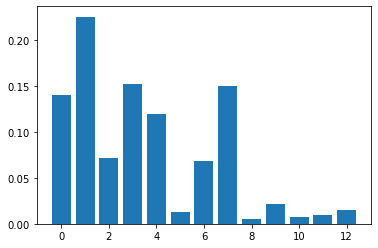

In [25]:
# To get feature importance

from matplotlib import pyplot

importance = CustChurnDT.feature_importances_

# Summarize feature importance

for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
    
# Plot feature importance

pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [26]:
CustChurn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   CreditScore        10000 non-null  int64   
 1   Age                10000 non-null  int64   
 2   Tenure             10000 non-null  int64   
 3   Balance            10000 non-null  float64 
 4   NumOfProducts      10000 non-null  int64   
 5   HasCrCard          10000 non-null  int64   
 6   IsActiveMember     10000 non-null  int64   
 7   EstimatedSalary    10000 non-null  float64 
 8   Exited             10000 non-null  category
 9   Geography_France   10000 non-null  uint8   
 10  Geography_Germany  10000 non-null  uint8   
 11  Geography_Spain    10000 non-null  uint8   
 12  Gender_Female      10000 non-null  uint8   
 13  Gender_Male        10000 non-null  uint8   
dtypes: category(1), float64(2), int64(6), uint8(5)
memory usage: 683.8 KB


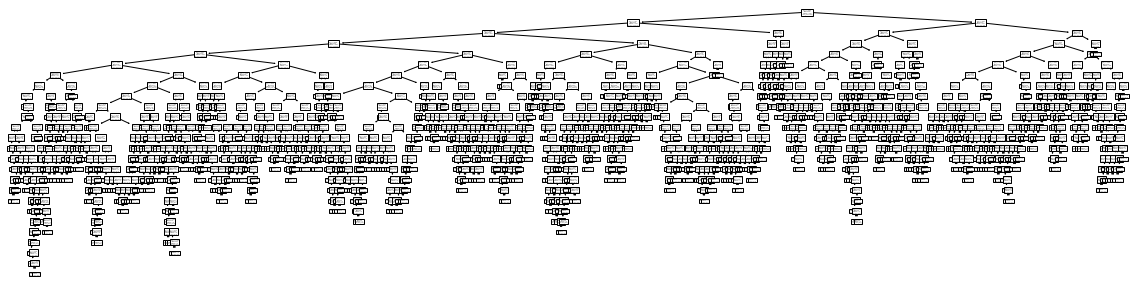

In [27]:
import matplotlib.pyplot as plt
from sklearn import tree

plt.figure(figsize=(20,5))
tree.plot_tree(CustChurnDT);